In [1]:
import torch
import mamtorch
import random
from reference import fullyconnected_reference
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda:0")

n, m, l= 16, 9048, 8
a = torch.randn((n, m), dtype=torch.float32, device=device)
b = torch.randn((m, l), dtype=torch.float32, device=device)
bias = torch.randn((l,), dtype=torch.float32, device=device)
beta = 0#random.uniform(0, 1)
print("Shape of A:", a.shape)
print("Shape of B:", b.shape)
print("Shape of bias:", bias.shape)
print("Beta value:", beta)

print()
print("Test kernel v3: fullyconnected")
print("Functionality check")
res, argmax, argmin = torch.ops.mamtorch_kernel_v3.fullyconnected(a, b, bias, beta)
res_ref, argmax_ref, argmin_ref = fullyconnected_reference(a, b, bias, beta)
res_err = torch.abs(res-res_ref).flatten().cpu().numpy()
argmax_err = torch.abs(argmax-argmax_ref).to(torch.float32).flatten().cpu().numpy()
argmin_err = torch.abs(argmin-argmin_ref).to(torch.float32).flatten().cpu().numpy()
res_ref = res_ref.flatten().cpu().numpy()

Shape of A: torch.Size([16, 9048])
Shape of B: torch.Size([9048, 8])
Shape of bias: torch.Size([8])
Beta value: 0

Test kernel v3: fullyconnected
Functionality check


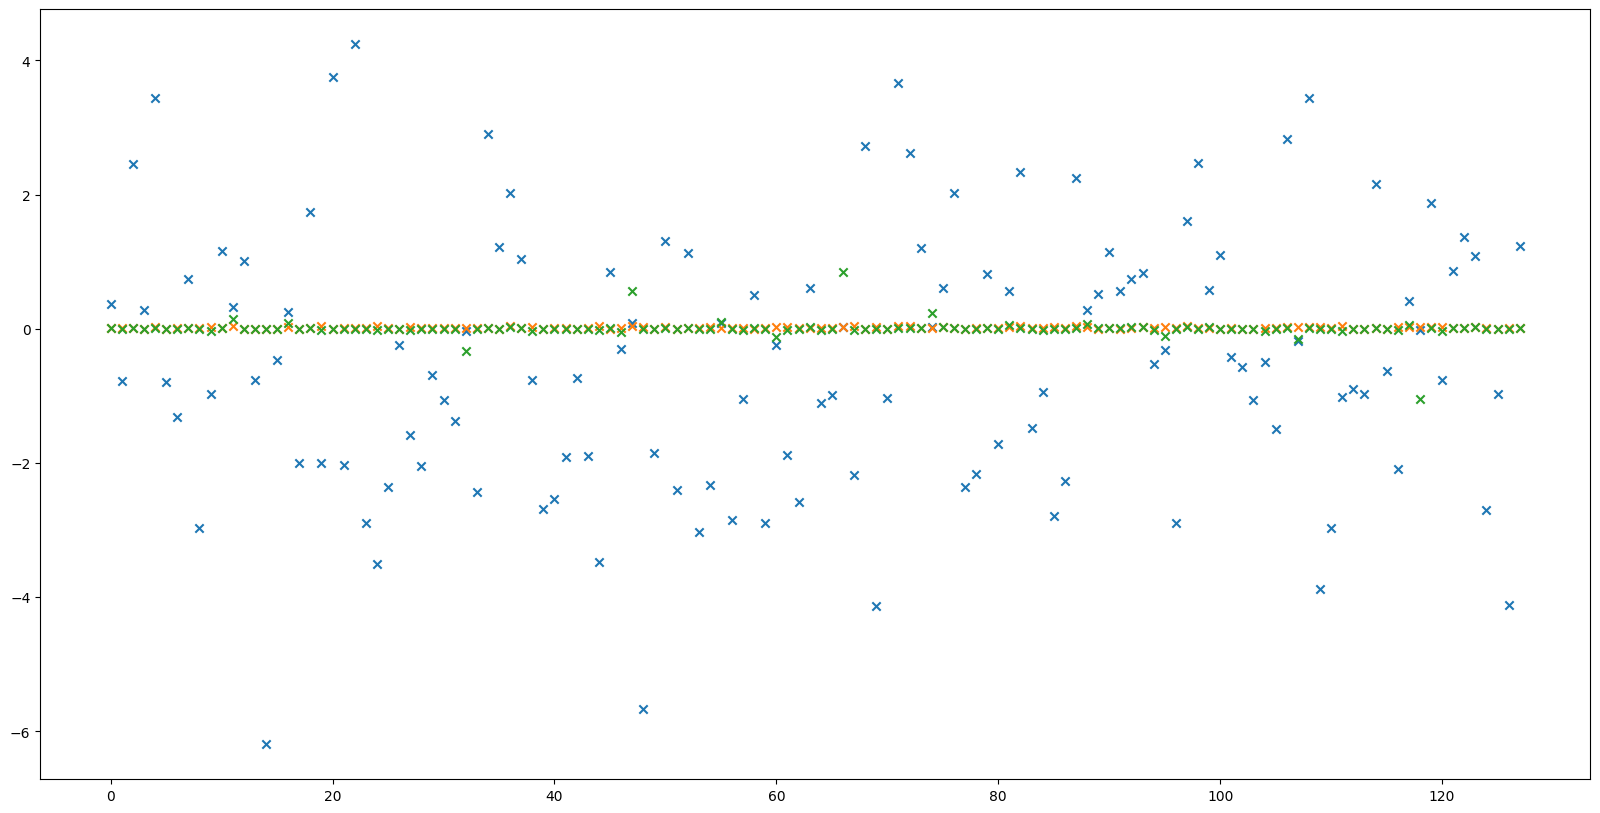

In [3]:
plt.figure(figsize=(20,10))
plt.scatter(range(len(res_ref)), res_ref, marker='x', alpha=1)
plt.scatter(range(len(res_err)), res_err, marker='x', alpha=1)
plt.scatter(range(len(res_err)), res_err/res_ref, marker='x', alpha=1)

In [4]:
import torch

A = torch.randn(5, 4, 3)
A = A/torch.norm(A, dim=-1)
print(torch.norm(A, dim=-1))

RuntimeError: The size of tensor a (3) must match the size of tensor b (4) at non-singleton dimension 2